In [1]:
from sklearn.linear_model._logistic import LogisticRegression

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay
)


In [4]:
df=pd.read_csv("pima-indians-diabetes.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinThickness               768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X =df.drop(columns=['Outcome'])
y = df['Outcome']


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [13]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1 Score: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [14]:
import numpy as np

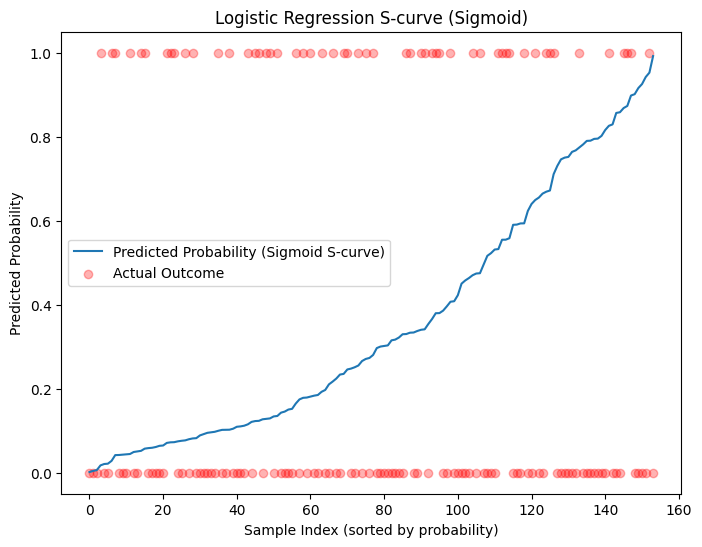

In [15]:
sorted_idx = np.argsort(y_prob)
X_test_sorted = X_test.iloc[sorted_idx]
y_prob_sorted = y_prob[sorted_idx]

plt.figure(figsize=(8, 6))
plt.plot(range(len(y_prob_sorted)), y_prob_sorted, label='Predicted Probability (Sigmoid S-curve)')
plt.scatter(range(len(Y_test)), Y_test, color='red', alpha=0.3, label='Actual Outcome')
plt.xlabel('Sample Index (sorted by probability)')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression S-curve (Sigmoid)')
plt.legend()
plt.show()

In [16]:
X_single = df[['DiabetesPedigreeFunction']]
y = df['Outcome']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X_single, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [19]:
y_prob = model.predict_proba(X_test)[:, 1]

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

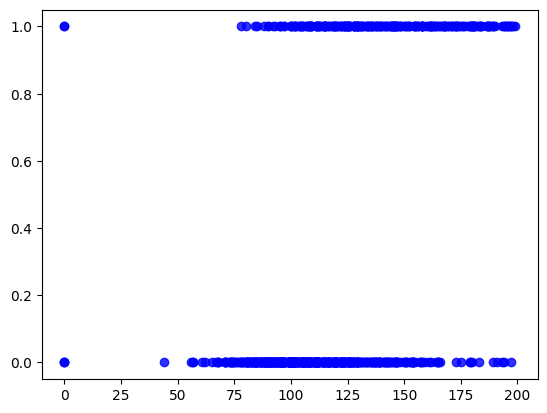

In [25]:
x = df['Glucose                   ']
y = df['Outcome']

# Logistic regression curve (smooth)
sns.regplot(x=x, y=y, logistic=True,
            scatter_kws={"color": "blue"},
            line_kws={"color": "red"})
plt.title("Logistic Regression Curve (Glucose vs Outcome)")
plt.xlabel("Glucose")
plt.ylabel("Diabetes Outcome")
plt.show()

In [21]:
print(df.columns)

Index(['Pregnancies               ', 'Glucose                   ',
       'BloodPressure             ', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
